In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

 
from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm
from statsmodels.api import add_constant
from statsmodels.api import Logit

from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,cohen_kappa_score,confusion_matrix,roc_curve,accuracy_score,roc_auc_score
from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from IPython.display import Image 

plt.rcParams['figure.figsize'] = [15,8]

In [2]:
df = pd.read_csv('Data_Train.csv')
df.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.00,MOR??AGE,0,0,GLENDALE NISSAN,12.5496,91300.0,42023.25,0,15.39,88.924,3,607161.90,0.0,19,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,REN?,0,0,Business Teacher,9.0048,27400.0,38133.00,0,9.94,102.856,0,269234.06,0.0,30,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,REN?,0,0,driver,24.9144,32800.0,17100.00,0,22.35,60.372,0,22476.53,0.0,25,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,REN?,0,0,AvePoint,16.5816,7000.0,5130.00,0,10.36,116.272,1,15242.09,0.0,22,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,REN?,0,0,Lead Tester,40.0512,70800.0,19665.00,0,13.68,127.280,1,65433.94,0.0,32,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [3]:
print('Shape of the data set is :', df.shape)
print('-------------------------------------------------------------')
print(df.info())


Shape of the data set is : (87500, 30)
-------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly Income        81925 non-null  float64
 6   Home Status          87500 non-null  object 
 7   Unpaid 2 years       87500 non-null  int64  
 8   Already Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt to Income       84011 non-null  float64
 11  Postal Code          86111 non-null  float64
 12  Lend Amount          87500 non-null  float64
 13  Deprecatory Records  87500 non-null

In [4]:
print('The data set consists of following data types:', '\n', df.dtypes)


The data set consists of following data types: 
 ID                       int64
Asst_Reg                 int64
GGGrade                 object
Experience              object
Validation              object
Yearly Income          float64
Home Status             object
Unpaid 2 years           int64
Already Defaulted        int64
Designation             object
Debt to Income         float64
Postal Code            float64
Lend Amount            float64
Deprecatory Records      int64
Interest Charged       float64
Usage Rate             float64
Inquiries                int64
Present Balance        float64
Gross Collection       float64
Sub GGGrade              int64
File Status             object
State                   object
Account Open             int64
Total Unpaid CL        float64
Duration                object
Unpaid Amount          float64
Reason                  object
Claim Type              object
Due Fee                float64
Loan/No Loan             int64
dtype: object


# Data Cleaning

In [5]:
# 

In [6]:
Total = df.isnull().sum().sort_values(ascending=False)          
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Yearly Income,5575,6.371429
Unpaid Amount,4852,5.545143
Total Unpaid CL,4186,4.784000
Debt to Income,3489,3.987429
Designation,1414,1.616000
Postal Code,1389,1.587429
Sub GGGrade,0,0.000000
File Status,0,0.000000
State,0,0.000000
Account Open,0,0.000000


1. From the above output, we can see that there are some null values present in the data set, where, column 'Yearly Income has maximum number of null values i.e, 6.37%, followed by 'Unpaid Amount', 'Total Unpaid CL', 'Debt To Income', 'Designation' and 'Postal Code' being the lowest in context of null values.

2. However, their percentage is not much so we cannot drop the columns as it may cause data loss. So, we are treating the null values with appropriate measures.

In [7]:
df['Yearly Income'].fillna(value = df['Yearly Income'].median(),inplace=True)
df['Unpaid Amount'].fillna(value = df['Unpaid Amount'].median(),inplace=True)
df['Total Unpaid CL'].fillna(value = df['Total Unpaid CL'].median(),inplace=True)
df['Debt to Income'].fillna(value = df['Debt to Income'].median(),inplace=True)
df['Designation'].fillna(df['Designation'].mode()[0], inplace=True)
df['Postal Code'].fillna(value = df['Postal Code'].mode()[0],inplace=True)

In [8]:
Total = df.isnull().sum().sort_values(ascending=False)          
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
ID,0,0.0
Asst_Reg,0,0.0
Due Fee,0,0.0
Claim Type,0,0.0
Reason,0,0.0
Unpaid Amount,0,0.0
Duration,0,0.0
Total Unpaid CL,0,0.0
Account Open,0,0.0
State,0,0.0


In [9]:
# Null values has been treated.

In [10]:
print('Total columns in the data set are as below:', '\n', df.columns)

Total columns in the data set are as below: 
 Index(['ID', 'Asst_Reg', 'GGGrade', 'Experience', 'Validation',
       'Yearly Income', 'Home Status', 'Unpaid 2 years', 'Already Defaulted',
       'Designation', 'Debt to Income', 'Postal Code', 'Lend Amount',
       'Deprecatory Records', 'Interest Charged', 'Usage Rate', 'Inquiries',
       'Present Balance', 'Gross Collection', 'Sub GGGrade', 'File Status',
       'State', 'Account Open', 'Total Unpaid CL', 'Duration', 'Unpaid Amount',
       'Reason', 'Claim Type', 'Due Fee', 'Loan/No Loan'],
      dtype='object')


In [11]:
df.rename(columns = {'Loan/No Loan':'Loan_Status'}, inplace=True)

In [12]:
print('Value Counts of Experience column is :', '\n' , df['Experience'].value_counts())
print('-----------------------------------------------------------------------------------------------------')
print('The data type of Experience column is:', '\n', df['Experience'].dtype)

Value Counts of Experience column is : 
 >10yrs    30849
2yrs       8064
3yrs       7350
<1yr       7209
1yrs       5853
5yrs       5623
4yrs       5324
7yrs       4762
8yrs       4604
6yrs       4255
9yrs       3607
Name: Experience, dtype: int64
-----------------------------------------------------------------------------------------------------
The data type of Experience column is: 
 object


In [13]:
df['Experience'] = df['Experience'].replace({'>10yrs':'10','1yrs':'1', '<1yr':'0', '2yrs':'2', '3yrs':'3', '4yrs':'4', 
                                                         '5yrs':'5', '6yrs':'6', '7yrs':'7', '8yrs':'8', '9yrs':'9'})

In [14]:
!pip install -U imbalanced-learn

In [15]:
print('Value Counts of Experience columns is :', '\n' , df['Experience'].value_counts())
print('-----------------------------------------------------------------------------------------------------')
print('The data type of Experience column is:', '\n', df['Experience'].dtype)

Value Counts of Experience columns is : 
 10    30849
2      8064
3      7350
0      7209
1      5853
5      5623
4      5324
7      4762
8      4604
6      4255
9      3607
Name: Experience, dtype: int64
-----------------------------------------------------------------------------------------------------
The data type of Experience column is: 
 object


In [16]:
df['GGGrade'] = df['GGGrade'].replace({'I':'1', 'II':'2','III':'3', 'IV':'4', 'V':'5', 'VI':'6', 'VII':'7'})

In [17]:
df['Home Status'] = df['Home Status'].replace({'MOR??AGE':'Mortgage', 'REN?':'Rent', 'OWN':'Own', 'OTHER':'Other', 'NONE':'None'})

In [18]:
df['Duration'] = df['Duration'].replace({'3 years':'3', '5 years':'5'})
df['Duration']=df['Duration'].astype(np.number)

In [19]:
df['Validation'] = df['Validation'].replace({'Vfied':'Verified', 'Not Vfied':'Not Verified'})

In [20]:
print(df['Home Status'].unique())
print('------------------------------------------------------------------------------')
print(df['Validation'].unique())
print('------------------------------------------------------------------------------')
print(df['Reason'].unique())
print('------------------------------------------------------------------------------')
print(df['Claim Type'].unique())

['Mortgage' 'Rent' 'Own' 'Other' 'None']
------------------------------------------------------------------------------
['Verified' 'Source Verified' 'Not Verified']
------------------------------------------------------------------------------
['debt  consolidation' 'major  purchase' 'other' 'credit  card' 'car'
 'home  improvement' 'small  business' 'moving' 'vacation' 'medical'
 'wedding' 'house' 'renewable  energy']
------------------------------------------------------------------------------
['I' 'J']


In [21]:
df['Claim Type'] = df['Claim Type'].map({'I':0, 'J':1})

In [22]:
df_copy = df.copy()

In [23]:
df_copy.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan_Status
0,95074,421802,2,10,Verified,633600.00,Mortgage,0,0,GLENDALE NISSAN,12.5496,91300.0,42023.25,0,15.39,88.924,3,607161.90,0.0,19,fully paid,California,17,58598.0,3.0,31216.05,debt consolidation,0,0.0,0
1,134131,3964312,4,7,Source Verified,85483.20,Rent,0,0,Business Teacher,9.0048,27400.0,38133.00,0,9.94,102.856,0,269234.06,0.0,30,whole,NC,15,18924.0,5.0,11660.49,debt consolidation,0,0.0,0
2,92602,4247560,3,0,Source Verified,79200.00,Rent,0,0,driver,24.9144,32800.0,17100.00,0,22.35,60.372,0,22476.53,0.0,25,whole,Florida,7,15604.0,5.0,5637.87,major purchase,0,0.0,0
3,22591,197179,3,0,Verified,61600.00,Rent,0,0,AvePoint,16.5816,7000.0,5130.00,0,10.36,116.272,1,15242.09,0.0,22,fully paid,NewJersey,9,22410.0,3.0,15607.17,major purchase,0,0.0,1
4,125060,4646684,5,2,Source Verified,68053.92,Rent,0,0,Lead Tester,40.0512,70800.0,19665.00,0,13.68,127.280,1,65433.94,0.0,32,fully paid,LA,10,36022.0,5.0,27472.86,debt consolidation,0,0.0,0


## EDA

In [24]:
df_copy['Loan_Status'].value_counts()

0    70988
1    16512
Name: Loan_Status, dtype: int64

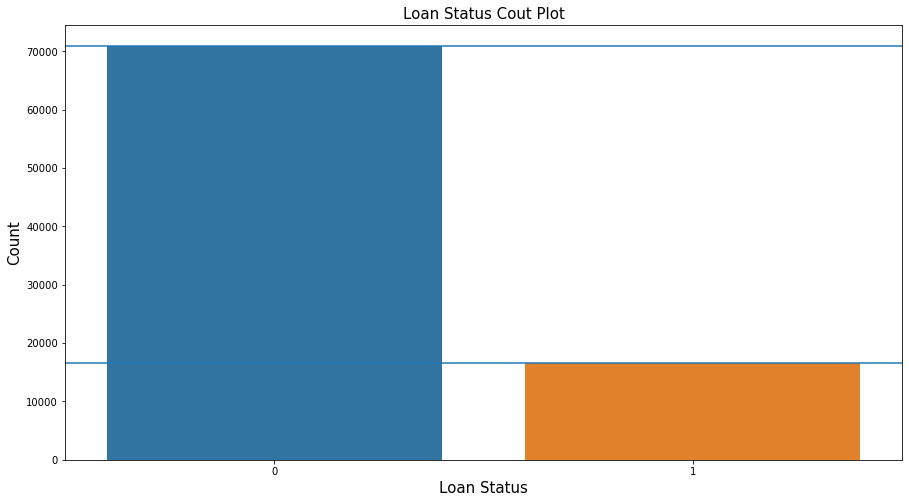

In [25]:
sns.countplot(x = df_copy['Loan_Status'])

plt.title('Loan Status Cout Plot', fontsize = 15)
plt.xlabel('Loan Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.axhline(y = 70988)
plt.axhline(y = 16512)
plt.show()

In [26]:
print(70988/len(df_copy['Loan_Status']))
print('-----------------------------------------------------------')
print(16512/len(df_copy['Loan_Status']))

0.8112914285714286
-----------------------------------------------------------
0.18870857142857142


The ratio of our data set is approximately 81.11:18.89. Hence, we need to balance our data set using SMOT analysis.

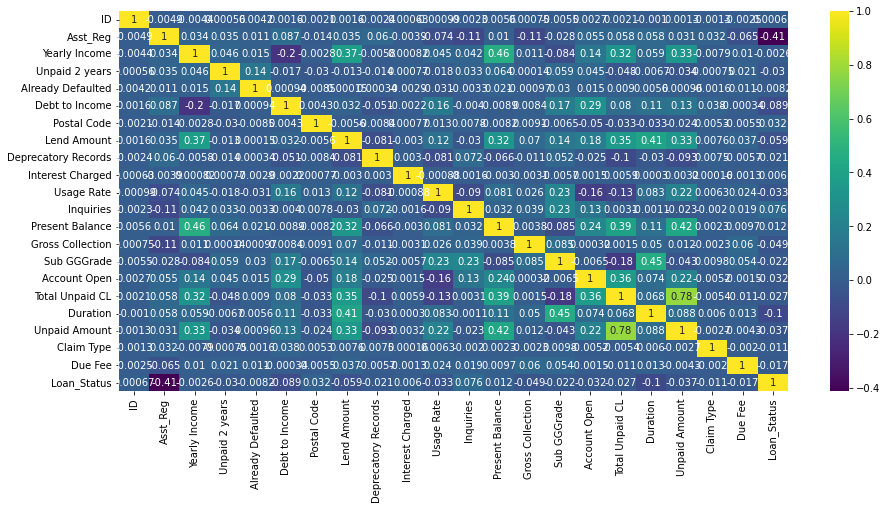

In [27]:
plt.figure(figsize=(15, 7))
sns.heatmap(df_copy.corr(), annot=True, cmap='viridis')
plt.show()

We can see that there is considerable correlation between "Unpaid Amount" and "Total Unpaid CL".

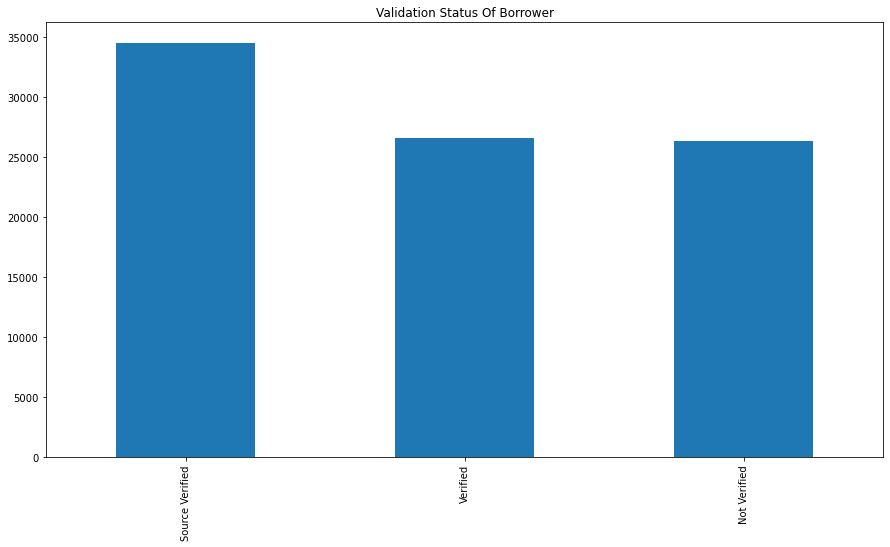

In [28]:
df_copy['Validation'].value_counts().plot(kind = 'bar', title = 'Validation Status Of Borrower', figsize=(15,8))
plt.show()

In [29]:
df_copy.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan_Status
0,95074,421802,2,10,Verified,633600.00,Mortgage,0,0,GLENDALE NISSAN,12.5496,91300.0,42023.25,0,15.39,88.924,3,607161.90,0.0,19,fully paid,California,17,58598.0,3.0,31216.05,debt consolidation,0,0.0,0
1,134131,3964312,4,7,Source Verified,85483.20,Rent,0,0,Business Teacher,9.0048,27400.0,38133.00,0,9.94,102.856,0,269234.06,0.0,30,whole,NC,15,18924.0,5.0,11660.49,debt consolidation,0,0.0,0
2,92602,4247560,3,0,Source Verified,79200.00,Rent,0,0,driver,24.9144,32800.0,17100.00,0,22.35,60.372,0,22476.53,0.0,25,whole,Florida,7,15604.0,5.0,5637.87,major purchase,0,0.0,0
3,22591,197179,3,0,Verified,61600.00,Rent,0,0,AvePoint,16.5816,7000.0,5130.00,0,10.36,116.272,1,15242.09,0.0,22,fully paid,NewJersey,9,22410.0,3.0,15607.17,major purchase,0,0.0,1
4,125060,4646684,5,2,Source Verified,68053.92,Rent,0,0,Lead Tester,40.0512,70800.0,19665.00,0,13.68,127.280,1,65433.94,0.0,32,fully paid,LA,10,36022.0,5.0,27472.86,debt consolidation,0,0.0,0


<Figure size 1080x576 with 0 Axes>

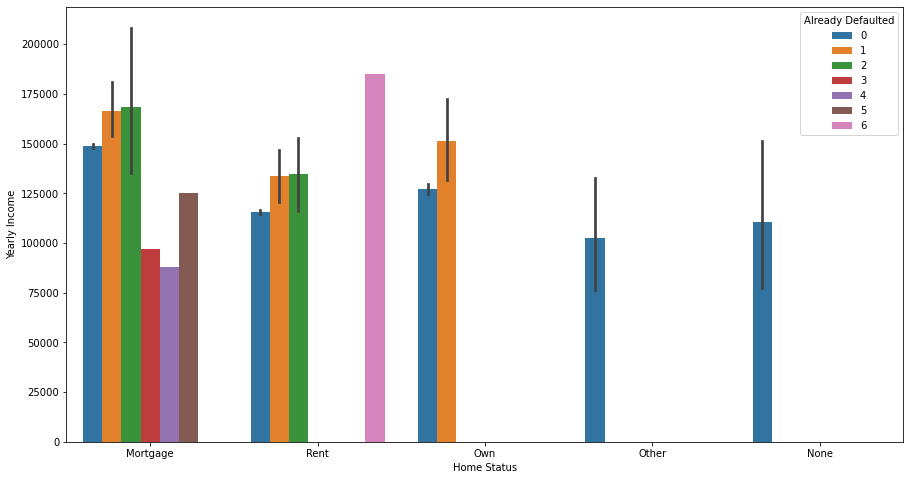

<Figure size 1080x576 with 0 Axes>

In [30]:
sns.barplot(x = df_copy['Home Status'], y = df_copy['Yearly Income'], hue = df_copy['Already Defaulted'])
plt.figure(figsize=(15,8))

We can see that the borrowers who have Mortgage, have defaulted maximum and maximum of 2 loans they have defaulted. Minimum being 4 loans already defaulted.

In [31]:
df_copy.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan_Status
0,95074,421802,2,10,Verified,633600.00,Mortgage,0,0,GLENDALE NISSAN,12.5496,91300.0,42023.25,0,15.39,88.924,3,607161.90,0.0,19,fully paid,California,17,58598.0,3.0,31216.05,debt consolidation,0,0.0,0
1,134131,3964312,4,7,Source Verified,85483.20,Rent,0,0,Business Teacher,9.0048,27400.0,38133.00,0,9.94,102.856,0,269234.06,0.0,30,whole,NC,15,18924.0,5.0,11660.49,debt consolidation,0,0.0,0
2,92602,4247560,3,0,Source Verified,79200.00,Rent,0,0,driver,24.9144,32800.0,17100.00,0,22.35,60.372,0,22476.53,0.0,25,whole,Florida,7,15604.0,5.0,5637.87,major purchase,0,0.0,0
3,22591,197179,3,0,Verified,61600.00,Rent,0,0,AvePoint,16.5816,7000.0,5130.00,0,10.36,116.272,1,15242.09,0.0,22,fully paid,NewJersey,9,22410.0,3.0,15607.17,major purchase,0,0.0,1
4,125060,4646684,5,2,Source Verified,68053.92,Rent,0,0,Lead Tester,40.0512,70800.0,19665.00,0,13.68,127.280,1,65433.94,0.0,32,fully paid,LA,10,36022.0,5.0,27472.86,debt consolidation,0,0.0,0


In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

## Model Building

## feature engg

In [33]:
df.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan_Status
0,95074,421802,2,10,Verified,633600.00,Mortgage,0,0,GLENDALE NISSAN,12.5496,91300.0,42023.25,0,15.39,88.924,3,607161.90,0.0,19,fully paid,California,17,58598.0,3.0,31216.05,debt consolidation,0,0.0,0
1,134131,3964312,4,7,Source Verified,85483.20,Rent,0,0,Business Teacher,9.0048,27400.0,38133.00,0,9.94,102.856,0,269234.06,0.0,30,whole,NC,15,18924.0,5.0,11660.49,debt consolidation,0,0.0,0
2,92602,4247560,3,0,Source Verified,79200.00,Rent,0,0,driver,24.9144,32800.0,17100.00,0,22.35,60.372,0,22476.53,0.0,25,whole,Florida,7,15604.0,5.0,5637.87,major purchase,0,0.0,0
3,22591,197179,3,0,Verified,61600.00,Rent,0,0,AvePoint,16.5816,7000.0,5130.00,0,10.36,116.272,1,15242.09,0.0,22,fully paid,NewJersey,9,22410.0,3.0,15607.17,major purchase,0,0.0,1
4,125060,4646684,5,2,Source Verified,68053.92,Rent,0,0,Lead Tester,40.0512,70800.0,19665.00,0,13.68,127.280,1,65433.94,0.0,32,fully paid,LA,10,36022.0,5.0,27472.86,debt consolidation,0,0.0,0


### state

In [34]:
df.State.unique()

array(['California', 'NC', 'Florida', 'NewJersey', 'LA', 'TX', 'CT', 'MI',
       'OR', 'AR', 'Newyork', 'MT', 'CO', 'Ohio', 'NM', 'MN', 'GA', 'WA',
       'Maryland', 'AL', 'SC', 'PA', 'AZ', 'UT', 'MA', 'VA', 'IL', 'WI',
       'NV', 'HI', 'RI', 'TN', 'OK', 'VT', 'IN', 'AK', 'MO', 'NE', 'NH',
       'DC', 'WV', 'MS', 'KY', 'KS', 'DE', 'ND', 'SD', 'WY', 'ME'],
      dtype=object)

In [35]:
west="WA,OR,ID,MT,WY,CO,UT,AZ,NM,California,NV".split(",")

south="OK,TX,LA,AR,Maryland,MS,AL,TN,KY,WV,GA,Florida,SC,NC,VA,DC,MD,DE,DC,MD".split(",")

North_east='NY,PA,NewJersey,CT,RI,MA,VT,NH,ME,Newyork'.split(",")

Mid_west='ND,SD,Ohio,NE,KS,MO,IA,MN,WI,IL,IN,OH,MI'.split(",")

pacific="HI,AK".split(",")

def state(x):
    if x in west:
        return"west"
    if x in south:
        return "south"
    if x in North_east:
        return"north_east"
    if x in Mid_west:
        return"mid_west"
    if x in pacific:
        return "pacific"




In [36]:
df["zone"]=df.State.apply(state)

df.zone.unique()

array(['west', 'south', 'north_east', 'mid_west', 'pacific'], dtype=object)

In [37]:
df.drop("State",axis=1,inplace=True)

In [38]:
#### Experience

df.Experience.unique()

more_than_10=[">10yrs"]
less_than_10=['7yrs', '<1yr', '2yrs', '1yrs', '4yrs', '9yrs', '6yrs',
       '5yrs', '8yrs', '3yrs']

def expe(x):
    if x in more_than_10:
        return "more_thn_10"
    if x in less_than_10:
        return "less_than_10"



In [39]:
df["Experience_c"]=df.Experience.apply(expe)
df.drop("Experience",axis=1,inplace=True)

In [40]:
#Based on previous analysis we can drop the deprecatory records 

In [41]:
df.drop(["Deprecatory Records"],axis=1,inplace=True)

In [42]:
df.groupby("Reason")["Lend Amount"].median()

Reason
car                    13680.00
credit  card           24795.00
debt  consolidation    25650.00
home  improvement      20520.00
house                  21075.75
major  purchase        17100.00
medical                11970.00
moving                 10302.75
other                  13680.00
renewable  energy      17100.00
small  business        23512.50
vacation                8550.00
wedding                13680.00
Name: Lend Amount, dtype: float64

In [43]:
#### Reason



low=["car","major  purchase","medical","moving","other","renewable  energy","vacation","wedding"]

def reason_amount(x):
    if x in low:
        return "low"
    else:
        return "high"

In [44]:
df["reason_amount"]=df.Reason.apply(reason_amount)
df.drop("Reason",axis=1,inplace=True)

In [45]:
df.head()

,ID,Asst_Reg,GGGrade,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Claim Type,Due Fee,Loan_Status,zone,Experience_c,reason_amount
0,95074,421802,2,Verified,633600.00,Mortgage,0,0,GLENDALE NISSAN,12.5496,91300.0,42023.25,15.39,88.924,3,607161.90,0.0,19,fully paid,17,58598.0,3.0,31216.05,0,0.0,0,west,None,high
1,134131,3964312,4,Source Verified,85483.20,Rent,0,0,Business Teacher,9.0048,27400.0,38133.00,9.94,102.856,0,269234.06,0.0,30,whole,15,18924.0,5.0,11660.49,0,0.0,0,south,None,high
2,92602,4247560,3,Source Verified,79200.00,Rent,0,0,driver,24.9144,32800.0,17100.00,22.35,60.372,0,22476.53,0.0,25,whole,7,15604.0,5.0,5637.87,0,0.0,0,south,None,low
3,22591,197179,3,Verified,61600.00,Rent,0,0,AvePoint,16.5816,7000.0,5130.00,10.36,116.272,1,15242.09,0.0,22,fully paid,9,22410.0,3.0,15607.17,0,0.0,1,north_east,None,low
4,125060,4646684,5,Source Verified,68053.92,Rent,0,0,Lead Tester,40.0512,70800.0,19665.00,13.68,127.280,1,65433.94,0.0,32,fully paid,10,36022.0,5.0,27472.86,0,0.0,0,south,None,high


In [46]:
df_copy=df.copy()

In [47]:
df_copy.head()

,ID,Asst_Reg,GGGrade,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Claim Type,Due Fee,Loan_Status,zone,Experience_c,reason_amount
0,95074,421802,2,Verified,633600.00,Mortgage,0,0,GLENDALE NISSAN,12.5496,91300.0,42023.25,15.39,88.924,3,607161.90,0.0,19,fully paid,17,58598.0,3.0,31216.05,0,0.0,0,west,None,high
1,134131,3964312,4,Source Verified,85483.20,Rent,0,0,Business Teacher,9.0048,27400.0,38133.00,9.94,102.856,0,269234.06,0.0,30,whole,15,18924.0,5.0,11660.49,0,0.0,0,south,None,high
2,92602,4247560,3,Source Verified,79200.00,Rent,0,0,driver,24.9144,32800.0,17100.00,22.35,60.372,0,22476.53,0.0,25,whole,7,15604.0,5.0,5637.87,0,0.0,0,south,None,low
3,22591,197179,3,Verified,61600.00,Rent,0,0,AvePoint,16.5816,7000.0,5130.00,10.36,116.272,1,15242.09,0.0,22,fully paid,9,22410.0,3.0,15607.17,0,0.0,1,north_east,None,low
4,125060,4646684,5,Source Verified,68053.92,Rent,0,0,Lead Tester,40.0512,70800.0,19665.00,13.68,127.280,1,65433.94,0.0,32,fully paid,10,36022.0,5.0,27472.86,0,0.0,0,south,None,high


In [48]:
df_copy.drop(["GGGrade","Designation","Postal Code","Sub GGGrade"],axis=1,inplace=True)

In [49]:
X = df_copy.drop(['Loan_Status'], axis =1)
df_target = df_copy['Loan_Status']

In [50]:
X = df_copy.drop(['Loan_Status'], axis =1)
df_target = df_copy['Loan_Status']

In [51]:
X=pd.get_dummies(X)

In [52]:
X.head()

,ID,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Lend Amount,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Claim Type,Due Fee,Validation_Not Verified,Validation_Source Verified,Validation_Verified,Home Status_Mortgage,Home Status_None,Home Status_Other,Home Status_Own,Home Status_Rent,File Status_fully paid,File Status_whole,zone_mid_west,zone_north_east,zone_pacific,zone_south,zone_west,reason_amount_high,reason_amount_low
0,95074,421802,633600.00,0,0,12.5496,42023.25,15.39,88.924,3,607161.90,0.0,17,58598.0,3.0,31216.05,0,0.0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0
1,134131,3964312,85483.20,0,0,9.0048,38133.00,9.94,102.856,0,269234.06,0.0,15,18924.0,5.0,11660.49,0,0.0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
2,92602,4247560,79200.00,0,0,24.9144,17100.00,22.35,60.372,0,22476.53,0.0,7,15604.0,5.0,5637.87,0,0.0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3,22591,197179,61600.00,0,0,16.5816,5130.00,10.36,116.272,1,15242.09,0.0,9,22410.0,3.0,15607.17,0,0.0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1
4,125060,4646684,68053.92,0,0,40.0512,19665.00,13.68,127.280,1,65433.94,0.0,10,36022.0,5.0,27472.86,0,0.0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0


In [53]:
X.drop("ID",axis=1,inplace=True)

In [54]:
sm = SMOTE(sampling_strategy=0.95,random_state=0)
X,df_target = sm.fit_resample(X, df_target)

In [55]:
df_target.value_counts(normalize = True)

0    0.512823
1    0.487177
Name: Loan_Status, dtype: float64

In [56]:
X.head()

,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Lend Amount,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Claim Type,Due Fee,Validation_Not Verified,Validation_Source Verified,Validation_Verified,Home Status_Mortgage,Home Status_None,Home Status_Other,Home Status_Own,Home Status_Rent,File Status_fully paid,File Status_whole,zone_mid_west,zone_north_east,zone_pacific,zone_south,zone_west,reason_amount_high,reason_amount_low
0,421802,633600.00,0,0,12.5496,42023.25,15.39,88.924,3,607161.90,0.0,17,58598.0,3.0,31216.05,0,0.0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0
1,3964312,85483.20,0,0,9.0048,38133.00,9.94,102.856,0,269234.06,0.0,15,18924.0,5.0,11660.49,0,0.0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
2,4247560,79200.00,0,0,24.9144,17100.00,22.35,60.372,0,22476.53,0.0,7,15604.0,5.0,5637.87,0,0.0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3,197179,61600.00,0,0,16.5816,5130.00,10.36,116.272,1,15242.09,0.0,9,22410.0,3.0,15607.17,0,0.0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1
4,4646684,68053.92,0,0,40.0512,19665.00,13.68,127.280,1,65433.94,0.0,10,36022.0,5.0,27472.86,0,0.0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.3)

In [58]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (96898, 34)
y_train (96898,)
X_test (41528, 34)
y_test (41528,)


In [59]:
X_train.head()

,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Lend Amount,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Claim Type,Due Fee,Validation_Not Verified,Validation_Source Verified,Validation_Verified,Home Status_Mortgage,Home Status_None,Home Status_Other,Home Status_Own,Home Status_Rent,File Status_fully paid,File Status_whole,zone_mid_west,zone_north_east,zone_pacific,zone_south,zone_west,reason_amount_high,reason_amount_low
34225,931858,211200.000000,0,0,33.432000,32832.000000,11.690000,159.960000,0,620533.590000,0.0,14,89142.000000,5.000000,85359.780000,0,0.0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
88593,721497,160716.788032,0,0,32.797047,34502.078740,22.353160,108.164342,0,453892.943184,0.0,17,56289.550726,4.205948,43885.038103,0,0.0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0
38165,6282624,114400.000000,0,0,29.769600,27360.000000,17.750000,96.492000,1,259270.840000,0.0,16,48306.000000,5.000000,27895.230000,0,0.0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0
132039,986577,90490.018335,0,0,37.346975,24522.883289,20.090660,69.078856,0,222788.912635,0.0,17,70962.414291,3.000000,27625.306996,0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
110058,1014588,118186.074904,0,0,26.247734,22593.280099,18.269723,109.456955,0,56136.301676,0.0,7,61244.375802,3.497780,42000.967024,0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [60]:
## Logit regression

In [61]:
X_train.head()

,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Lend Amount,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Claim Type,Due Fee,Validation_Not Verified,Validation_Source Verified,Validation_Verified,Home Status_Mortgage,Home Status_None,Home Status_Other,Home Status_Own,Home Status_Rent,File Status_fully paid,File Status_whole,zone_mid_west,zone_north_east,zone_pacific,zone_south,zone_west,reason_amount_high,reason_amount_low
34225,931858,211200.000000,0,0,33.432000,32832.000000,11.690000,159.960000,0,620533.590000,0.0,14,89142.000000,5.000000,85359.780000,0,0.0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
88593,721497,160716.788032,0,0,32.797047,34502.078740,22.353160,108.164342,0,453892.943184,0.0,17,56289.550726,4.205948,43885.038103,0,0.0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0
38165,6282624,114400.000000,0,0,29.769600,27360.000000,17.750000,96.492000,1,259270.840000,0.0,16,48306.000000,5.000000,27895.230000,0,0.0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0
132039,986577,90490.018335,0,0,37.346975,24522.883289,20.090660,69.078856,0,222788.912635,0.0,17,70962.414291,3.000000,27625.306996,0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
110058,1014588,118186.074904,0,0,26.247734,22593.280099,18.269723,109.456955,0,56136.301676,0.0,7,61244.375802,3.497780,42000.967024,0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [62]:
#Model1 
# Logistic Regression
# Model1 
# Logistic Regression
logreg = Logit(y_train, X_train).fit()



         Current function value: 0.353631
         Iterations: 35


C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [63]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                96898
Model:                          Logit   Df Residuals:                    96864
Method:                           MLE   Df Model:                           33
Date:                Thu, 07 Jul 2022   Pseudo R-squ.:                  0.4895
Time:                        15:09:23   Log-Likelihood:                -34266.
converged:                      False   LL-Null:                       -67128.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Asst_Reg                    -4.91e-07   5.24e-09    -93.733      0.000   -5.01e-07   -4.81e-07
Yearly Income               3.726e-06   1.57e-07     23.712      0.000    3.42e-06 

In [64]:
logreg.pvalues[logreg.pvalues>0.05].index

Index(['Already Defaulted', 'Gross Collection', 'Claim Type',
       'Home Status_None', 'Home Status_Other'],
      dtype='object')

In [65]:
drop_list=list(logreg.pvalues[logreg.pvalues>0.05].index)

In [66]:
X_train.drop(drop_list,axis=1,inplace=True)

In [67]:
X_test.drop(drop_list,axis=1,inplace=True)

In [68]:
print('AIC is Akaike Information Criterion value','\n', logreg.aic)

AIC is Akaike Information Criterion value 
 68600.30942484706


In [69]:
pd.options.display.float_format = '{:.6f}'.format

In [70]:
#Model1 
# Logistic Regression
# Model1 
# Logistic Regression
logreg = Logit(y_train, X_train).fit()

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.362491
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                96898
Model:                          Logit   Df Residuals:                    96869
Method:                           MLE   Df Model:                           28
Date:                Thu, 07 Jul 2022   Pseudo R-squ.:                  0.4768
Time:                        15:09:24   Log-Likelihood:                -35125.
converged:                       True   LL-Null:                       -67128.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Asst_Reg                   -4.697e-07   5.16e-09    -91.053      0.000    -4

In [71]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds'])
df_odds

,Odds
Asst_Reg,1.000000
Yearly Income,1.000004
Unpaid 2 years,0.872674
Debt to Income,1.008235
Lend Amount,0.999986
Interest Charged,1.107737
Usage Rate,1.007855
Inquiries,1.054328
Present Balance,1.000000
Account Open,1.042975


In [72]:
y_pred_prob = logreg.predict(X_test.astype(np.float))

y_pred_prob.head()

190      0.367471
37423    0.108535
109851   0.994742
70563    0.259461
4317     0.487104
dtype: float64

In [73]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
y_pred[:10]

[0, 0, 1, 0, 0, 0, 0, 1, 1, 0]

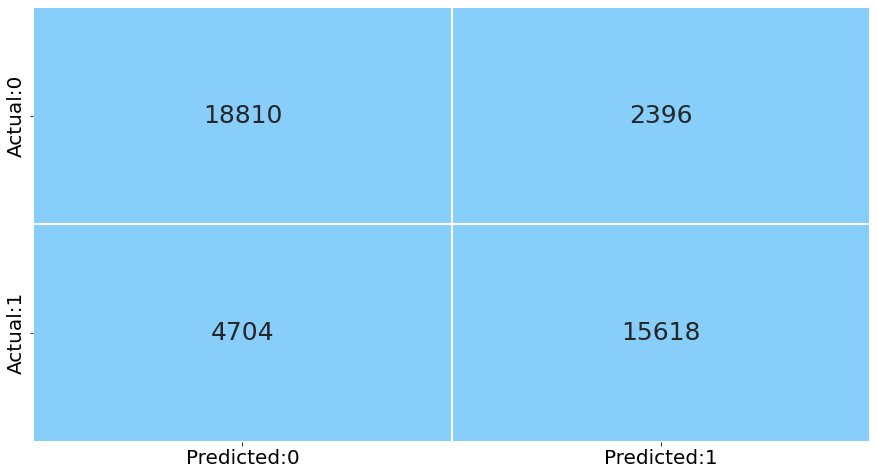

In [74]:
cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [75]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [76]:
acc_table = classification_report(y_test, y_pred)

print(acc_table)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84     21206
           1       0.87      0.77      0.81     20322

    accuracy                           0.83     41528
   macro avg       0.83      0.83      0.83     41528
weighted avg       0.83      0.83      0.83     41528



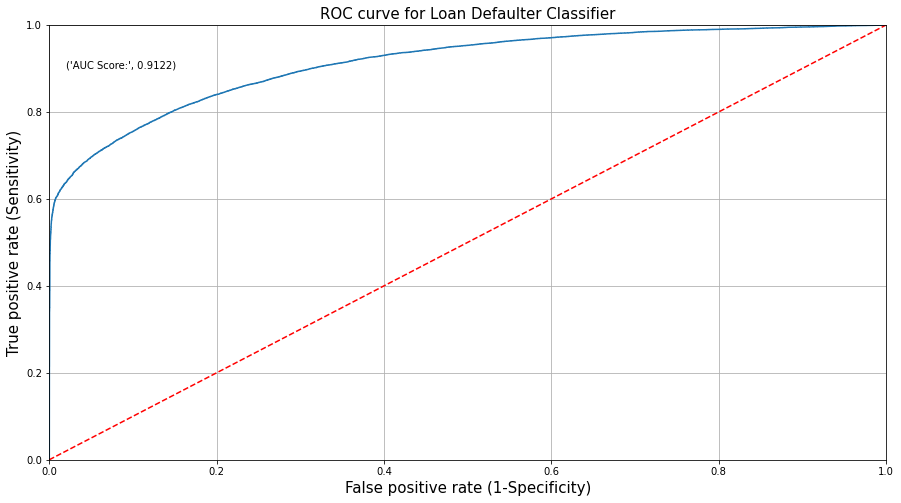

In [77]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for Loan Defaulter Classifier', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
                
plt.grid(True)


In [78]:
#Identifying the Best cut-offs using Youden's Index
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.764787,0.108460,0.507586,0.656327
1,0.764689,0.108413,0.507938,0.656276
2,0.764639,0.108366,0.508018,0.656274
3,0.764689,0.108460,0.507828,0.656229
4,0.764639,0.108413,0.507984,0.656227


As we can see that the optimal cut-off probability is approximately 0.50. Let us consider this cut-off to predict the target values. i.e. if 'y_pred_prob' is less than 0.50, then consider it to be 0 else consider it to be 1.

In [79]:
y_pred_youden = [ 0 if x < 0.50 else 1 for x in y_pred_prob]
y_pred_youden[:10]

[0, 0, 1, 0, 0, 0, 0, 1, 1, 0]

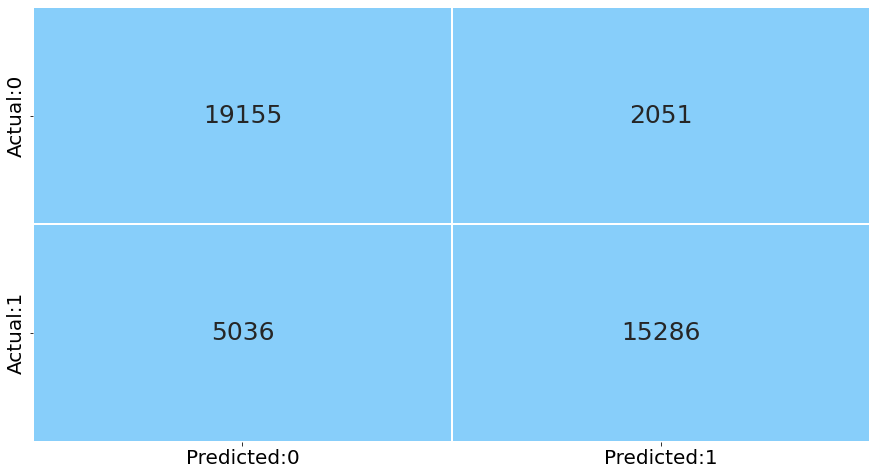

In [80]:
cm = confusion_matrix(y_test, y_pred_youden)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [81]:
acc_table = classification_report(y_test, y_pred_youden)

print(acc_table)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84     21206
           1       0.88      0.75      0.81     20322

    accuracy                           0.83     41528
   macro avg       0.84      0.83      0.83     41528
weighted avg       0.84      0.83      0.83     41528



We can see that the model with cut-off = 0.53, is 84% accurate.

In [82]:
kappa = cohen_kappa_score(y_test, y_pred_youden)
print('kappa value:',kappa)

kappa value: 0.6574847577431244


As the kappa score for the full model (with cut-off probability 0.53) is 0.5187, we can say that there is substantial agreement between the actual and predicted values.

In [83]:
# Model 2
# Random Forest

In [84]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

rf_model = rf_classification.fit(X_train, y_train)

In [85]:
def get_train_report(model):
     
    train_pred = model.predict(X_train)
    
    return(classification_report(y_train, train_pred))

def get_test_report(model):

    test_pred = model.predict(X_test)
    
    return(classification_report(y_test, test_pred))

In [86]:
train_report = get_train_report(rf_model)

print(train_report) 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     49782
           1       1.00      0.98      0.99     47116

    accuracy                           0.99     96898
   macro avg       0.99      0.99      0.99     96898
weighted avg       0.99      0.99      0.99     96898



In [87]:
test_report = get_test_report(rf_model)

print(test_report)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     21206
           1       0.93      0.82      0.87     20322

    accuracy                           0.88     41528
   macro avg       0.89      0.88      0.88     41528
weighted avg       0.89      0.88      0.88     41528



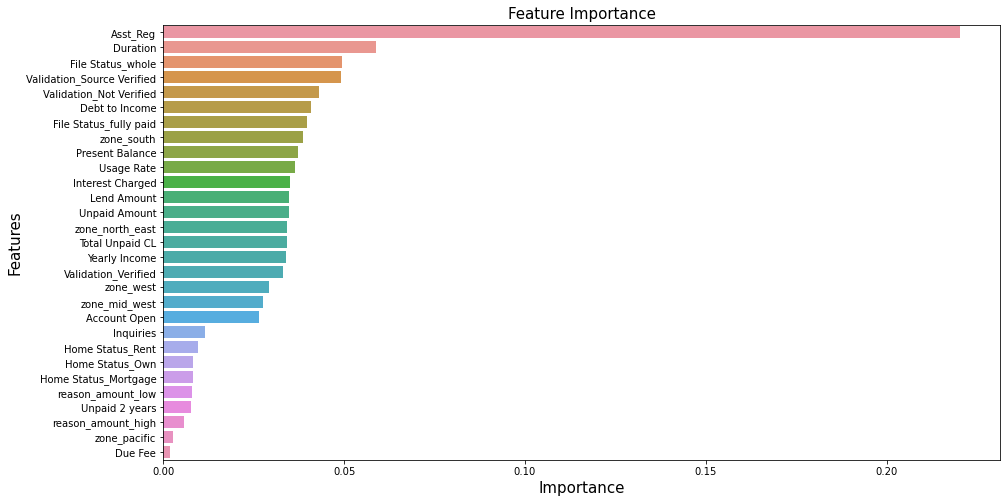

In [88]:
# Feature Importance

important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

In [89]:
# Model 3 
# AdaBoost Model

In [90]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [91]:
# Generalised functions

def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

def get_test_report(model):
    
    test_pred = model.predict(X_test)

    return(classification_report(y_test, test_pred))

def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for Loan Defaulter Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

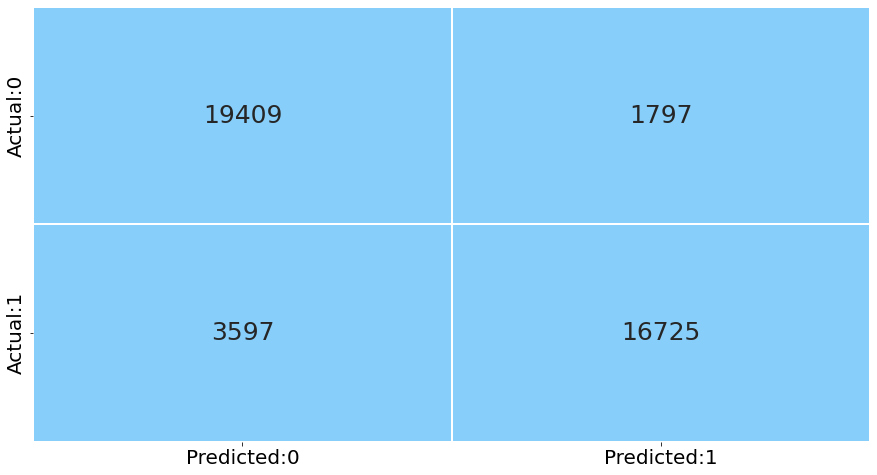

In [92]:
plot_confusion_matrix(ada_model)

In [93]:
test_report = get_test_report(ada_model)

print(test_report)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     21206
           1       0.90      0.82      0.86     20322

    accuracy                           0.87     41528
   macro avg       0.87      0.87      0.87     41528
weighted avg       0.87      0.87      0.87     41528



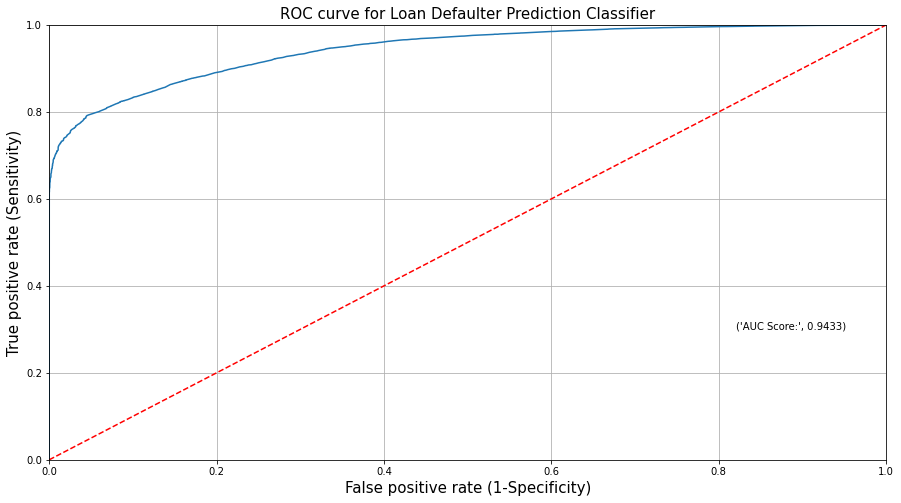

In [94]:
plot_roc(ada_model)

We can see that the accuracy of our model is 87% and AUC (Area Under the Curve) Score is 0.94.

In [95]:
# Model 4 
# Gradient Boost Model

In [96]:
gboost_model = GradientBoostingClassifier(n_estimators =40, max_depth = 10, random_state = 10)

gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=40, random_state=10)

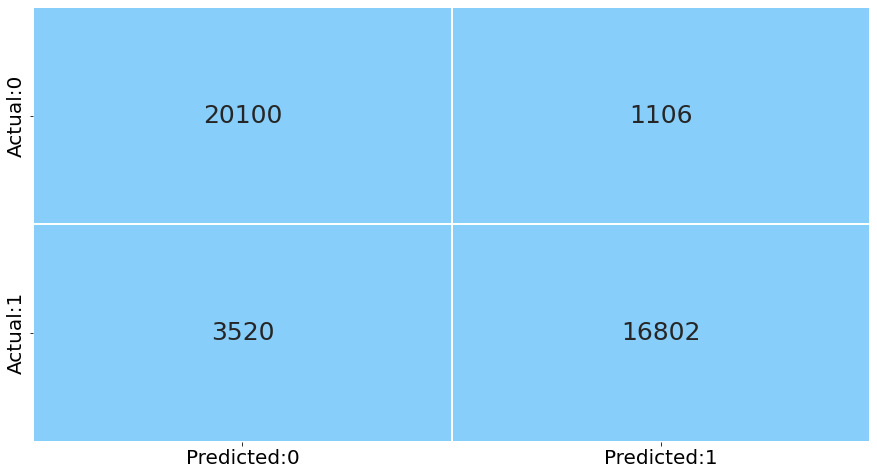

In [97]:
plot_confusion_matrix(gboost_model)

In [98]:
test_report = get_test_report(gboost_model)

print(test_report)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     21206
           1       0.94      0.83      0.88     20322

    accuracy                           0.89     41528
   macro avg       0.89      0.89      0.89     41528
weighted avg       0.89      0.89      0.89     41528



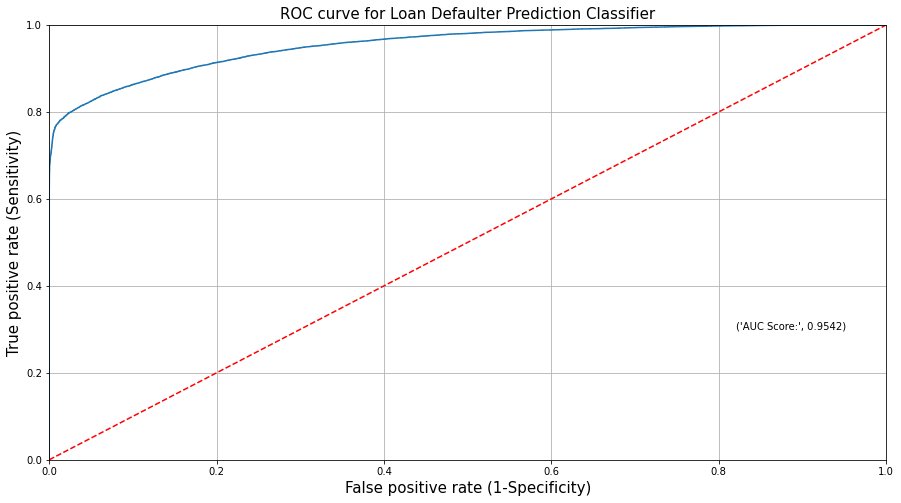

In [99]:
plot_roc(gboost_model)

We cans see that the accuracy of our gradient boosting model is 89% and AUC Score is 0.95, which is better in terms of our Ada boost model.